In [1]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Import gz2 data as a table
filename = "Data\GZ2_main_with_photometry_and_redshift_new.fits" # Table 5 with SDSS metadata (redshift, photometry)

with fits.open(filename) as data:
    gz2_data = Table(data[1].data)

print(gz2_data.info())

<Table length=243500>
                             name                              dtype  n_bad
------------------------------------------------------------- ------- -----
                                                    specobjid   int64     0
                                                     dr8objid   int64     0
                                                     dr7objid   int64     0
                                                           ra float32     0
                                                          dec float32     0
                                                     rastring   str11     0
                                                    decstring   str11     0
                                                       sample   str20     0
                                                     gz2class   str20     0
                                        total_classifications   int16     0
                                                  total_votes   in

In [2]:
gz2_data_pandas = gz2_data.to_pandas()
gz2_data_pandas.loc[(gz2_data_pandas["t06_odd_a14_yes_count"] >= 20) & (gz2_data_pandas["t06_odd_a14_yes_debiased"] > 0.42) & (gz2_data_pandas["t08_odd_feature_a24_merger_count"] >= 10) & (gz2_data_pandas["t08_odd_feature_a24_merger_debiased"] > 0.4), "mergers_yes"] = 1
gz2_data_pandas["mergers_yes"].fillna(0, inplace=True)
gz2_data = Table.from_pandas(gz2_data_pandas)

mergers = gz2_data[gz2_data["mergers_yes"] == 1]

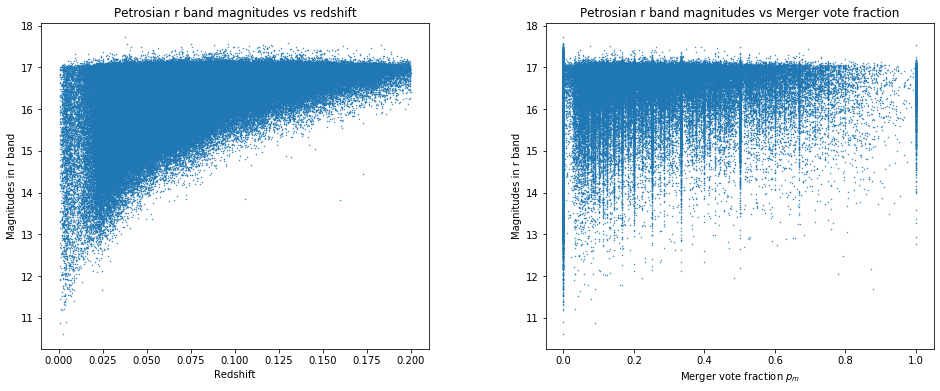

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot r band magnitudes against redshift
ax[0].scatter(gz2_data[gz2_data["REDSHIFT"] <= 0.2]["REDSHIFT"], gz2_data[gz2_data["REDSHIFT"] <= 0.2]["PETROMAG_R"], s=0.2)
ax[0].set_xlabel("Redshift")
ax[0].set_ylabel("Magnitudes in r band")
ax[0].set_title("Petrosian r band magnitudes vs redshift")

# Plot r band magnitudes against merger vote fraction
ax[1].scatter(gz2_data["t08_odd_feature_a24_merger_debiased"], gz2_data["PETROMAG_R"], s=0.2)
ax[1].set_xlabel("Merger vote fraction $p_m$")
ax[1].set_ylabel("Magnitudes in r band")
ax[1].set_title("Petrosian r band magnitudes vs Merger vote fraction")

fig.subplots_adjust(wspace=0.3)

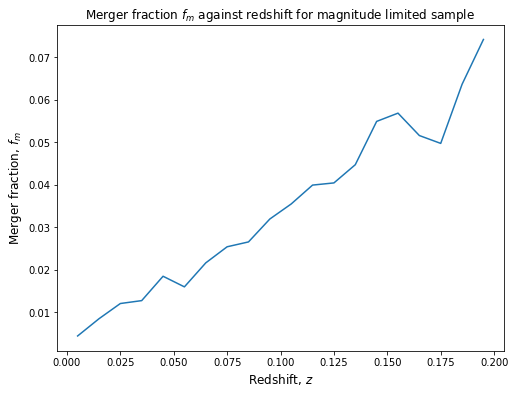

In [16]:
magnitude_limited = gz2_data[(gz2_data["PETROMAG_R"] < 17) & (gz2_data["PETROMAG_R"] > 16.5)]
magnitude_limited_mergers = magnitude_limited[magnitude_limited["mergers_yes"] == 1]

allbinned, mag_bin_edges = np.histogram(magnitude_limited["REDSHIFT"], bins=np.arange(0, 0.21, 0.01))
mergersbinned, mag_bin_edges = np.histogram(magnitude_limited_mergers["REDSHIFT"], bins=np.arange(0,  0.21, 0.01))

magnitude_limited_mergerfraction = mergersbinned / allbinned
bin_centres = np.arange(0, 0.21, 0.01) + 0.005

plt.plot(bin_centres[:-1], magnitude_limited_mergerfraction)
plt.xlabel("Redshift, $z$", fontsize=12)
plt.ylabel("Merger fraction, $f_m$", fontsize=12)
plt.title("Merger fraction $f_m$ against redshift for magnitude limited sample", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

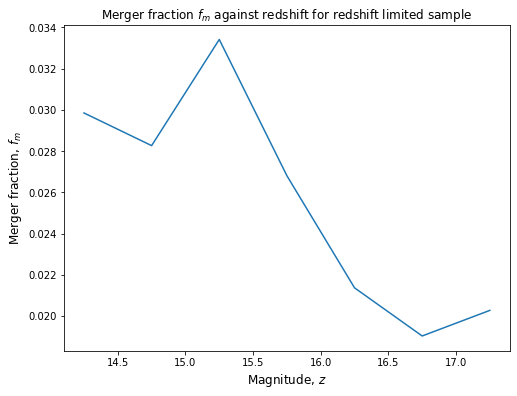

In [22]:
redshift_limited = gz2_data[(gz2_data["REDSHIFT"] < 0.07) & (gz2_data["REDSHIFT"] > 0.04)]
redshift_limited_mergers = redshift_limited[redshift_limited["mergers_yes"] == 1]

allbinned, mag_bin_edges = np.histogram(redshift_limited["PETROMAG_R"], bins=np.arange(14, 18, 0.5))
mergersbinned, mag_bin_edges = np.histogram(redshift_limited_mergers["PETROMAG_R"], bins=np.arange(14, 18, 0.5))

magnitude_limited_mergerfraction = mergersbinned / allbinned
bin_centres = np.arange(14, 18, 0.5) + 0.25

plt.plot(bin_centres[:-1], magnitude_limited_mergerfraction)
plt.xlabel("Magnitude, $z$", fontsize=12)
plt.ylabel("Merger fraction, $f_m$", fontsize=12)
plt.title("Merger fraction $f_m$ against redshift for redshift limited sample", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()